In [ ]:

import pandas as pd
import numpy as np



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   participant_id            10000 non-null  int64  
 1   date                      10000 non-null  object 
 2   age                       10000 non-null  int64  
 3   gender                    10000 non-null  object 
 4   height_cm                 10000 non-null  float64
 5   weight_kg                 10000 non-null  float64
 6   activity_type             10000 non-null  object 
 7   duration_minutes          10000 non-null  int64  
 8   intensity                 10000 non-null  object 
 9   calories_burned           10000 non-null  float64
 10  avg_heart_rate            10000 non-null  int64  
 11  hours_sleep               10000 non-null  float64
 12  stress_level              10000 non-null  int64  
 13  daily_steps               10000 non-null  int64  
 14  hydrati

<ipython-input-2-017986df3a22>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='health_condition', data= data, palette="viridis")


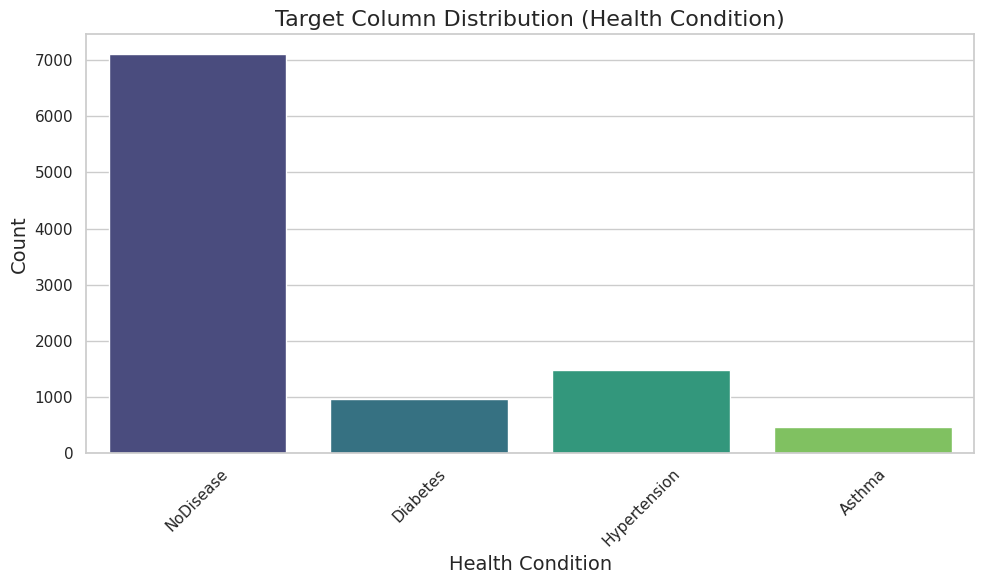

   participant_id        date  age  gender  height_cm  weight_kg  \
0             579  2024-07-20   58       0      160.4       99.2   
1            1934  2024-08-23   34       0      173.8       95.4   
2             953  2024-05-18   50       0      159.8       89.3   
3             312  2024-11-12   57       0      165.4      112.2   
4            2830  2024-01-27   41       1      169.1       67.5   

   activity_type  duration_minutes  intensity  calories_burned  ...  \
0              5                67          2             15.5  ...   
1              8               100          0             22.2  ...   
2              4               104          2             30.2  ...   
3              1               110          2             34.9  ...   
4              1               115          2             21.9  ...   

   stress_level  daily_steps  hydration_level   bmi  resting_heart_rate  \
0             1         8754              1.6  23.7                63.8   
1             

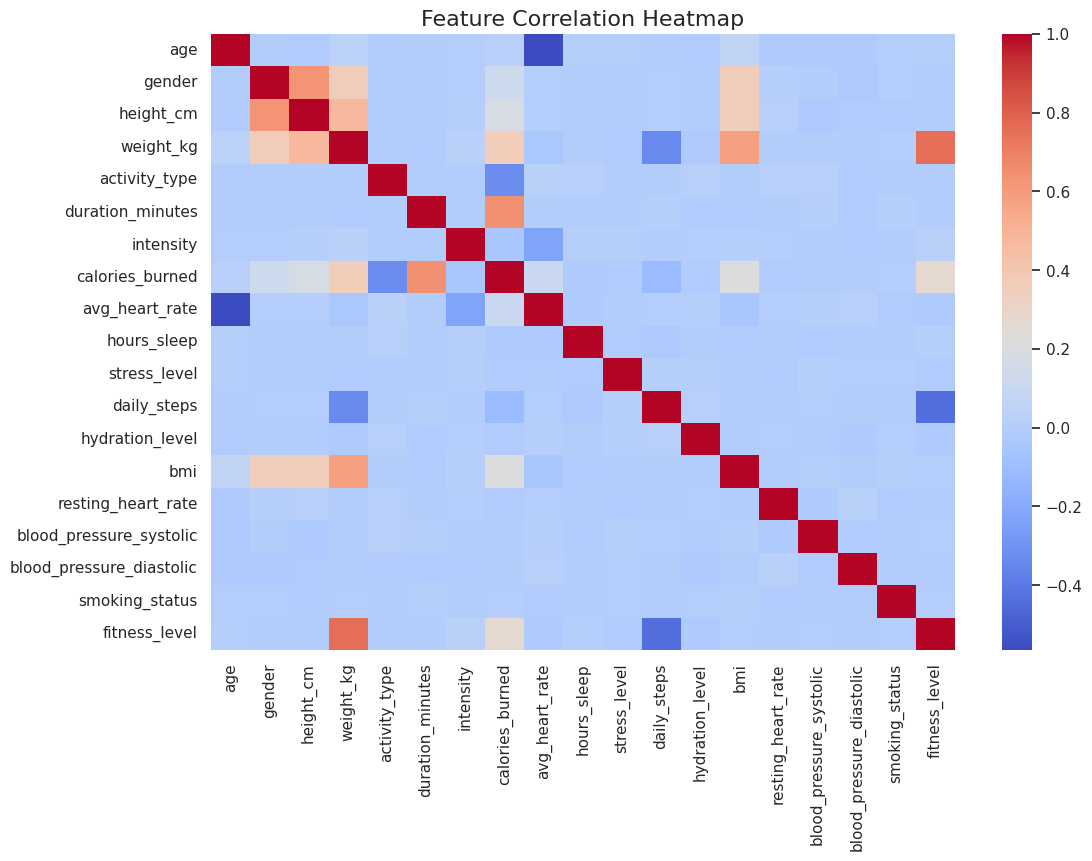

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



Model: Decision Tree
Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

      Asthma       0.71      0.78      0.74      2132
    Diabetes       0.62      0.65      0.64      2131
Hypertension       0.58      0.59      0.59      2132
   NoDisease       0.62      0.53      0.57      2131

    accuracy                           0.64      8526
   macro avg       0.63      0.64      0.63      8526
weighted avg       0.63      0.64      0.63      8526

Confusion Matrix:
 [[1653  187  160  132]
 [ 201 1382  298  250]
 [ 252  304 1265  311]
 [ 221  341  440 1129]]

Model: Random Forest
Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

      Asthma       0.88      0.95      0.91      2132
    Diabetes       0.85      0.87      0.86      2131
Hypertension       0.85      0.78      0.81      2132
   NoDisease       0.82      0.81      0.81      2131

    accuracy                           0.85      8526
   ma

<ipython-input-2-017986df3a22>:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")


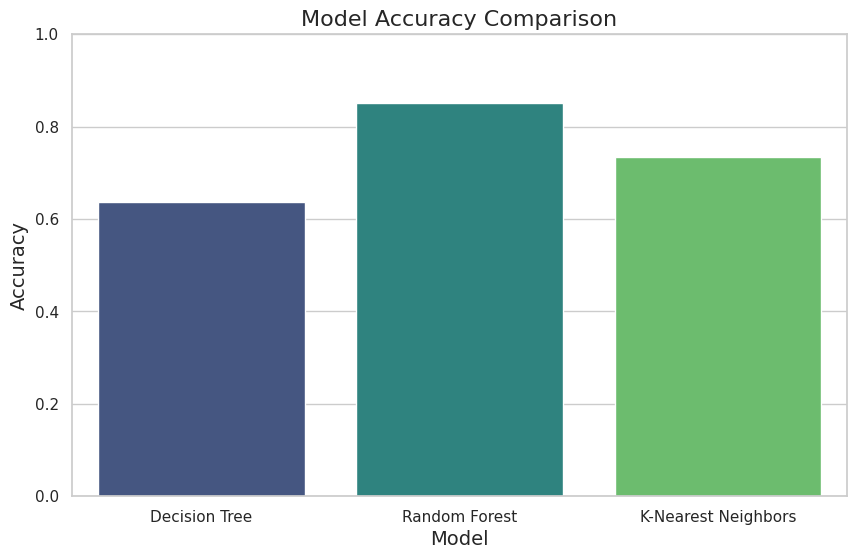

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
# from sklearn.impute import SimpleImputer

## Loading dataset
df = pd.read_csv('/content/health_fitness_dataset.csv')
df_sampled = df.sample(n=10000, random_state=42)
df_sampled.to_csv('downsampled_dataset.csv', index=False)
data = pd.read_csv('downsampled_dataset.csv')
data.shape
data['health_condition'] = data['health_condition'].replace([None], "NoDisease")



sns.set_theme(style="whitegrid")


## 1. Dataset Overview
data.shape
overview_info = data.info()
# overview_head = data.head()



## 2. Bar Chart of N classes from target

target_counts = data['health_condition'].value_counts()
print(target_counts)

plt.figure(figsize=(10, 6))
sns.countplot(x='health_condition', data= data, palette="viridis")
plt.title('Target Column Distribution (Health Condition)', fontsize=16)
plt.xlabel('Health Condition', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()


## Step 1: Handle Missing or Faulty Data

missing_values = data.isnull().sum()
# print(missing_values)                         # no relevant missing values (since target has renamed the class "None ")


data = data.dropna(subset=['health_condition'])  # dropping 'health_condition' (target variable)

## Step 2: Encode Categorical Variables

categorical_columns = ['gender', 'activity_type', 'intensity', 'smoking_status']    #Label Encoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


## Step 3: Feature Selection

features = data.drop(columns=['participant_id', 'date', 'health_condition'])  #target and non-numeric and irrelevant in predicting the target
target = data['health_condition']

# Encoding the target variable
target_encoder = LabelEncoder()
target = target_encoder.fit_transform(target)

overview_head = data.head()
print(overview_head)

# Step 4: Correlation Analysis
plt.figure(figsize=(12, 8))
correlation_matrix = features.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

# Step 5: Addressing Imbalance in Target Variable

smote = SMOTE(random_state=42)                # Applying SMOTE to balance the dataset to avoid biasness towards majority
X_resampled, y_resampled = smote.fit_resample(features, target)

# Step 6: Dataset Splitting (stratified 70:30)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled ,test_size=0.3, random_state= 42, stratify= y_resampled)

# Step 7: Feature Scaling (using standard scaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Model Training and Testing

models = {
    'Decision Tree': DecisionTreeClassifier(random_state= 42),
    'Random Forest': RandomForestClassifier(random_state= 42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=target_encoder.classes_)
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

# Step 9: Displaying Results
for model_name, result in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {result['accuracy']:.2f}")
    print("Classification Report:\n", result['classification_report'])
    print("Confusion Matrix:\n", result['confusion_matrix'])

# Visualizing Model Accuracy
model_accuracies = {model_name: result['accuracy'] for model_name, result in results.items()}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.ylim(0, 1)
plt.show()
